In [46]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
df

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False
...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,USU96 Comdty,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261,False
896,897,USZ96 Comdty,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000,False
897,898,USH97 Comdty,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741,True
898,899,USM97 Comdty,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070,True


In [52]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier

# you need to load your dataframe
df = pd.read_csv("Treasury Squeeze raw score data.csv")

X = df[['price_crossing','price_distortion']]  # specify the columns you want to use
y = df['squeeze']
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(675, 2) (675,)


Text(0, 0.5, 'price_distortion')

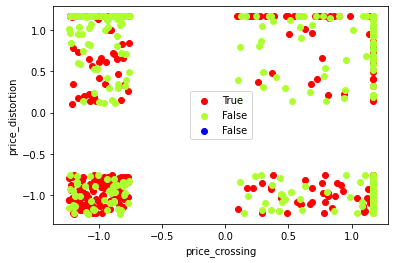

In [51]:
#visualize
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
#it doesnt like "xrange" changed to "range"
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(df['squeeze'])
plt.xlabel('price_crossing')
plt.ylabel('price_distortion')

In [54]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [55]:
print( clf.coef_)
print( clf.intercept_)

[[0.43199031 0.58347613]]
[-1.04259868]


ValueError: x and y must have same first dimension, but have shapes (0,) and (7,)

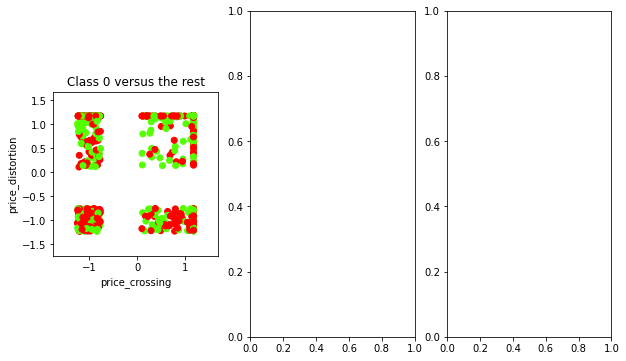

In [56]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
Xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('price_crossing')
    axes[i].set_ylabel('price_distortion')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - Xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)

In [57]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )

[ True]
[6.93174275]


/Users/or/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/or/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.5585185185185185


In [59]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.5822222222222222


In [62]:
print( metrics.classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

       False       0.61      0.88      0.72       136
        True       0.41      0.12      0.19        89

    accuracy                           0.58       225
   macro avg       0.51      0.50      0.45       225
weighted avg       0.53      0.58      0.51       225



In [63]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[120  16]
 [ 78  11]]


In [ ]:
print("My name is Gabriel Regalado")
print("My NetID is: gregal2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")